In [2]:
from scipy import stats
import numpy as np

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate([population_ages1, population_ages2])
population_ages

array([53, 53, 60, ..., 24, 32, 22], dtype=int64)

In [3]:
mean_mu = np.mean(population_ages)
mean_mu

43.005468

In [4]:
np.random.seed(42)
# Lets sample some random ages
sample_ages = np.random.choice(a=population_ages, size=500)
sample_ages.shape

(500,)

In [5]:
sample_ages.mean(), abs(sample_ages.mean() - population_ages.mean())

(43.436, 0.43053199999999947)

In [6]:
population_races = ((["white"]*100000) + (["black"] * 50000 + (["hispanic"] * 50000) + (["asian"] * 25000) + (["other"] * 25000)))
demo_sample = np.random.choice(population_races, 1000, replace=False)

for race in set(demo_sample):
    proportion = np.count_nonzero(demo_sample == race) / len(demo_sample)
    print(f"{race} proportion estimate: {proportion}")

other proportion estimate: 0.098
white proportion estimate: 0.394
hispanic proportion estimate: 0.201
asian proportion estimate: 0.116
black proportion estimate: 0.191


## Cental Limit Theorem

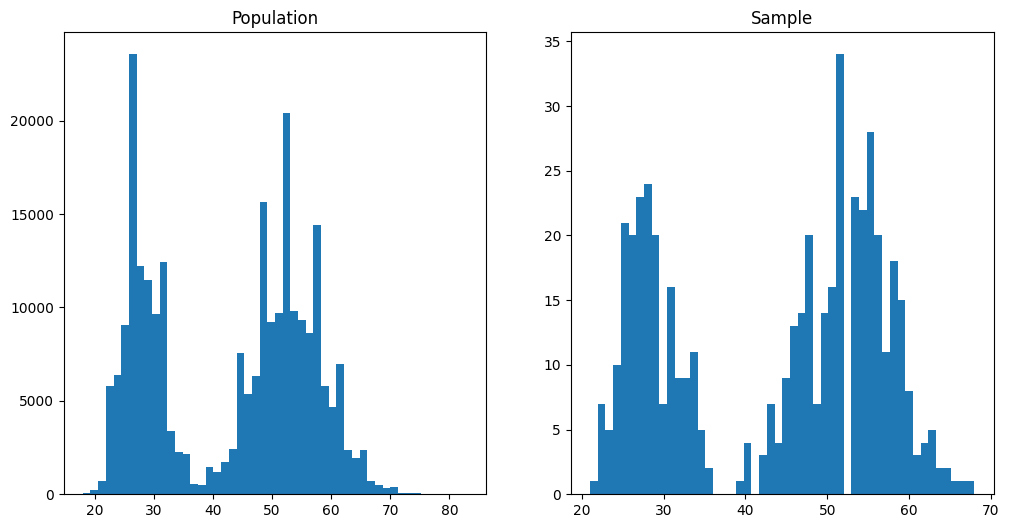

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(population_ages, bins=50)
axs[0].set_title("Population")
axs[1].hist(sample_ages, bins=50)
axs[1].set_title("Sample")
plt.show()

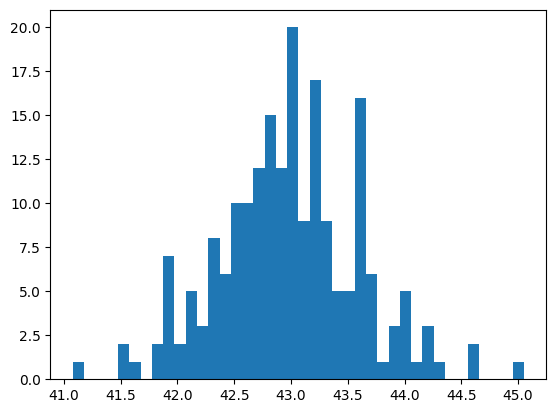

In [8]:
point_estimates = []

for _ in range(200):
    sample = np.random.choice(population_ages, size=500)
    point_estimates.append(sample.mean())

plt.hist(point_estimates, bins=40)
plt.show()

### Calculating 95% conficence interval using Z-scores

In [9]:
from scipy import stats

sample_size = 1000
sample = np.random.choice(population_ages, size=sample_size)
sample_mean = sample.mean()
sample_std = sample.std()

z_critical = stats.norm.ppf(q=0.975)

error = z_critical * sample_std / (sample_size ** 0.5)
confidence_interval = (sample_mean - error, sample_mean + error)
print(f"Confidence interval: {confidence_interval}")

Confidence interval: (42.27689557939852, 43.947104420601484)


### Using t-scores

Let's take a new smaller sample and then create a confidence interval without the population standard deviation, uisng the `t-distribution`.

In [19]:
np.random.seed(42)
sample_size = 25
sample = np.random.choice(population_ages, size=sample_size)
sample_mean = sample.mean()
degrees_of_freedom = sample_size - 1

# Calculate t score for 95% confidence interval
t_score = stats.t.ppf(q=0.975, df=degrees_of_freedom)
print(f"T score = {t_score}")

sample_std = sample.std()
margin_error = t_score * sample_std / (sample_size ** 0.5)
confidence_interval = (sample_mean - margin_error, sample_mean + margin_error)
confidence_interval

T score = 2.0638985616280205


(40.24930556336858, 51.03069443663142)

## Using predefined `interval` function

In [20]:
np.random.seed(42)
sigma = sample_std / (sample_size ** 0.5)
interval = stats.t.interval(confidence=0.95,
                            df=degrees_of_freedom,
                            loc=sample_mean,
                            scale=sigma)
interval

(40.24930556336858, 51.03069443663142)

## Confidence interval from `proportions`

In [21]:
z_score = stats.norm.ppf(q=0.975)
point_estimate_proportion = 0.192
n = 1000
margin_error = z_score * ((point_estimate_proportion * (1-point_estimate_proportion) / n) ** 0.5)
confidence_interval = (point_estimate_proportion - margin_error, point_estimate_proportion + margin_error)
confidence_interval

(0.16758794241348748, 0.21641205758651252)

In [24]:
confidence_interval = stats.norm.interval(confidence=0.95,
                                          loc=point_estimate_proportion,
                                          scale=margin_error / z_score)
confidence_interval

(0.16758794241348748, 0.21641205758651252)